In [2]:
pip install roboflow

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="API_KEY")
project = rf.workspace("tatmantech").project("worldwide_currency")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [4]:
!pip install ultralytics
import subprocess

subprocess.run([
    "yolo", "train",
    "data=worldwide_currency/data.yaml",
    "model=yolov8n.pt",
    "epochs=50",
    "imgsz=640"
])


CompletedProcess(args=['yolo', 'train', 'data=worldwide_currency/data.yaml', 'model=yolov8n.pt', 'epochs=50', 'imgsz=640'], returncode=1)

In [11]:
!ls /content/datasets/worldwide_currency-5/


ls: cannot access '/content/datasets/worldwide_currency-5/': No such file or directory


In [12]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Train on the downloaded dataset
model.train(data="/content/datasets/worldwide_currency-5/data.yaml", epochs=10, imgsz=640)

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/worldwide_currency-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 56.0MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 314MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/worldwide_currency-5/train/labels... 4305 images, 3 backgrounds, 0 corrupt: 100%|██████████| 4305/4305 [00:01<00:00, 2285.27it/s]


train: New cache created: /content/datasets/worldwide_currency-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/datasets/worldwide_currency-5/valid/labels... 409 images, 0 backgrounds, 0 corrupt: 100%|██████████| 409/409 [00:00<00:00, 747.58it/s]

val: New cache created: /content/datasets/worldwide_currency-5/valid/labels.cache


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.46G       1.53      3.365      1.728          4        640: 100%|██████████| 270/270 [01:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]

                   all        409       1634      0.474      0.157     0.0868     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.39G      1.335      2.321      1.525          1        640: 100%|██████████| 270/270 [01:11<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.71it/s]

                   all        409       1634      0.465      0.195      0.177      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.6G      1.282       2.05      1.469          6        640: 100%|██████████| 270/270 [01:11<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]

                   all        409       1634      0.329      0.272      0.194      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.51G      1.251      1.873      1.445          1        640: 100%|██████████| 270/270 [01:11<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.69it/s]

                   all        409       1634        0.4       0.33      0.273      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.55G      1.209      1.714      1.411          2        640: 100%|██████████| 270/270 [01:11<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]

                   all        409       1634      0.511      0.341      0.305      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.75G      1.183      1.592      1.392          2        640: 100%|██████████| 270/270 [01:10<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        409       1634      0.567      0.306      0.325      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.39G      1.152      1.483      1.362          1        640: 100%|██████████| 270/270 [01:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]

                   all        409       1634      0.643      0.339      0.376       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.4G      1.126       1.41      1.331          3        640: 100%|██████████| 270/270 [01:10<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]

                   all        409       1634      0.504       0.38      0.397      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.44G      1.099      1.342      1.319          6        640: 100%|██████████| 270/270 [01:11<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]


                   all        409       1634      0.455      0.411       0.41      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.67G      1.079      1.304      1.309          9        640: 100%|██████████| 270/270 [01:10<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        409       1634      0.663      0.371      0.432      0.268



10 epochs completed in 0.213 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.3MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]


                   all        409       1634      0.665      0.371      0.432      0.268
                     1         24         81      0.635      0.395      0.408      0.177
                    10         37        123      0.777      0.454      0.614      0.351
                   100         47        110      0.559      0.691      0.599       0.37
                  1000         30         83      0.656      0.578      0.571      0.342
                 10000         19         43       0.62      0.379      0.508      0.348
                  100k          3          4          1          0     0.0396      0.021
                     2          8         30      0.696     0.0783      0.365      0.234
                    20         39        115      0.611      0.519      0.554      0.317
                   200         16         37      0.641      0.432      0.544      0.353
                  2000         10         16          1          0     0.0875     0.0531
                   20

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7d713fcf10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,


0: 448x640 6 bowls, 1 dining table, 13.0ms
Speed: 2.6ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


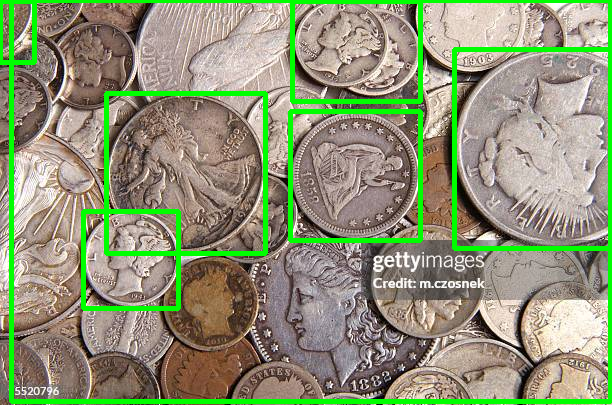

In [21]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load the trained YOLO model
model = YOLO("yolo11n.pt")

# Load an image for testing
image_path = "coins.png"
image = cv2.imread(image_path)

results = model(image)

for result in results:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

# Save and display result
cv2.imwrite("money_detected.png", image)
cv2_imshow(image)

In [25]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO("/content/runs/detect/train10/weights/best.pt")

# Export the model to TensorRT format (for NVIDIA GPU acceleration)
model.export(format="engine")  # Converts model to TensorRT (.engine)


WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,743 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train10/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 25, 8400) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.2s, saved as '/content/runs/detect/train10/weights/best.onnx' (11.7 MB)

TensorRT: starting export with TensorRT 10.8.0.43...
TensorRT: input "images" with shape(1, 3, 640, 640) DataType.FLOAT
TensorRT: output "output0" with shape(1, 25, 8400) DataType.FLOAT
TensorRT: building FP32 engine as /content/runs/detect/train10/weights/best.engine
TensorRT: export success ✅ 56.9s, saved as '/content/runs/detect/train10/weights/best.engine' (15.4 MB)

Export complete (57.1s)
Results saved to /conten

'/content/runs/detect/train10/weights/best.engine'

In [26]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO("/content/runs/detect/train10/weights/best.pt")

model.export(format="torchscript")  # Converts model to TorchScript (.pt)

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,009,743 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train10/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 25, 8400) (6.0 MB)

TorchScript: starting export with torch 2.5.1+cu124...
TorchScript: export success ✅ 2.4s, saved as '/content/runs/detect/train10/weights/best.torchscript' (11.9 MB)

Export complete (4.5s)
Results saved to /content/runs/detect/train10/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train10/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train10/weights/best.torchscript imgsz=640 data=/content/datasets/worldwide_currency-5/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train10/weights/best.torchscript'


0: 640x640 2 100s, 2 20s, 2 50s, 12 banknotes, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


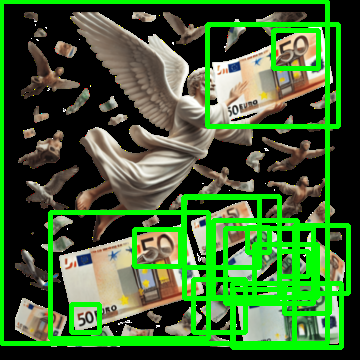

In [28]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load the trained YOLO model
model = YOLO("/content/runs/detect/train10/weights/best.pt")

# Load an image for testing
image_path = "banknotes.png"
image = cv2.imread(image_path)

results = model(image)

for result in results:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

# Save and display result
cv2.imwrite("money_detected.png", image)
cv2_imshow(image)


0: 480x640 1 1, 2 100s, 3 banknotes, 40.6ms
Speed: 6.2ms preprocess, 40.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


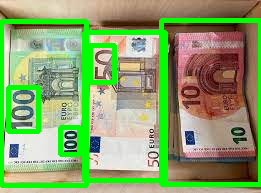

In [29]:
image_path = "banknotes1.jpg"
image = cv2.imread(image_path)

results = model(image)

for result in results:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

# Save and display result
cv2.imwrite("money_detected.png", image)
cv2_imshow(image)